# trabalhando co planilhas do excel

In [5]:
import pandas as pd

In [6]:
#Leitura dos arquivos
df1 = pd.read_excel("datasets/Aracaju.xlsx")
df2 = pd.read_excel("datasets/Fortaleza.xlsx")
df3 = pd.read_excel("datasets/Natal.xlsx")
df4 = pd.read_excel("datasets/Recife.xlsx")
df5 = pd.read_excel("datasets/Salvador.xlsx")

In [7]:
#juntando todos os arquivos
df = pd.concat([df1,df2, df3, df4, df5])

In [10]:
# 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [11]:
# 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [15]:
# pegar uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
60,Aracaju,2018-01-01,215.88,1521,3
46,Natal,2019-03-26,753.00,853,2
125,Recife,2019-03-02,37.60,983,4
70,Natal,2019-02-14,743.00,854,4
56,Aracaju,2018-01-01,41.90,1523,6


In [14]:
# verificando os tipos de dados de cada coluna

In [17]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [19]:
# alterando o tipo de dados de uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


# Tratando valores faltantes

In [24]:
df.isnull().sum() # traz a soma dos valores nulos

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [23]:
#substituino valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True) #vendas tem valores nulo, aqui substitui pela média das vendas. inplace=True substitui em memória

In [25]:
#substituindo valores nulos por 0
df["Vendas"].fillna(0, inplace=True)

In [26]:
#apagar linhas com valores nulos
df.dropna(inplace=True)

In [27]:
# quando há diferentes colunas com nulos, apaga apenas de uma
df.dropna(subset=["Vendas"], inplace=True)

In [29]:
#removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [30]:
# Criando novas colunas

In [33]:
#criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"]) #multiplica a coluna de vendas com a de quantidade, inserindo os valores na nova coluna Receita

In [34]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [35]:
#se os dados fosse assim, mas sem a qtde
df["Receitas/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [36]:
# retornando a maior receita
df["Receita"].max()

3544.0

In [37]:
# retornando a menor receita
df["Receita"].min()

3.34

In [38]:
# top n com maiores numeros em uma coluna
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [40]:
# top n com piores numeros em uma coluna
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [41]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum() #agrupa por cidade e soma os valores da receita

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [42]:
#ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [43]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [44]:
#verifica o tipo de cada coluna
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID              object
Qtde                 int64
Receita            float64
Receitas/Vendas    float64
dtype: object

In [45]:
#transformando a coluna de datas em data
df["Data"] = pd.to_datetime(df["Data"])

In [46]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [47]:
# agrupamento por ano
#qual a receita por ano - ao passar do tempo, a receita aumenta ou diminui
df.groupby(df["Data"].dt.year)["Receita"].sum() #dt.year = vai na data e extrai o ano

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [48]:
#criando uma coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [49]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda
93,Salvador,2019-01-01,15.58,1037,1,15.58,1.0,2019
118,Fortaleza,2019-03-02,17.70,981,5,88.50,5.0,2019
47,Natal,2018-03-13,521.00,854,3,1563.00,3.0,2018
49,Salvador,2019-01-01,37.88,1034,2,75.76,2.0,2019
142,Salvador,2019-01-02,7.12,1034,1,7.12,1.0,2019


In [50]:
#Extraindo o mês e dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [51]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1


In [52]:
# retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [53]:
#data mais atual
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [54]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [55]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias
16,Aracaju,2018-01-01,37.68,1522,10,376.80,10.0,2018,1,1,0 days
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days
53,Recife,2019-01-01,37.05,983,6,222.30,6.0,2019,1,1,365 days
32,Aracaju,2018-01-01,42.97,1522,6,257.82,6.0,2018,1,1,0 days
27,Aracaju,2018-01-01,3.39,1523,4,13.56,4.0,2018,1,1,0 days


In [56]:
# criando a coluna de trimestre
df["trimeste_venda"] = df["Data"].dt.quarter

In [59]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimeste_venda
60,Recife,2019-01-01,37.97,983,1,37.97,1.0,2019,1,1,365 days,1
91,Salvador,2019-01-01,17.74,1035,1,17.74,1.0,2019,1,1,365 days,1
40,Natal,2018-01-10,885.00,853,3,2655.00,3.0,2018,1,10,9 days,1
170,Natal,2019-01-02,9.26,1035,3,27.78,3.0,2019,1,2,366 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1


In [61]:
# Filtrando as vendas de 2019 do mês março
#subconjunto
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [62]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimeste_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de dados

In [66]:
#quantas linhas um elemento tem, no caso as lojas
#a loja 1036 fez 117 vendas, por exemplo
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

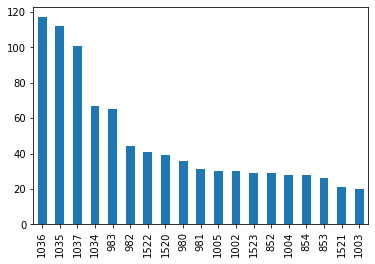

In [71]:
#Plotando um gráfico
df["LojaID"].value_counts(ascending=False).plot.bar();

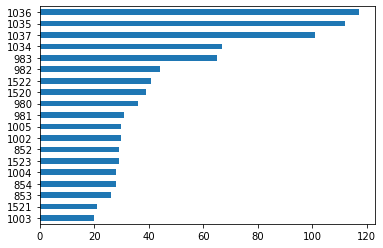

In [70]:
df["LojaID"].value_counts(ascending=True).plot.barh();

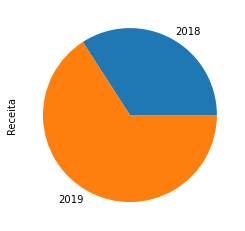

In [74]:
#Gráfico de pizza
#receitas por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [75]:
#Gráfico de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

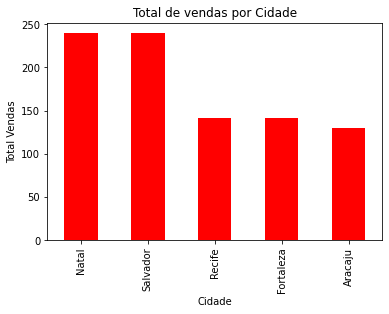

In [78]:
#Adicionando um titulo e nome para os eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [79]:
# Alterando o estilo do matplolib
# ver estilo na documentação do matplotlib
plt.style.use("ggplot")


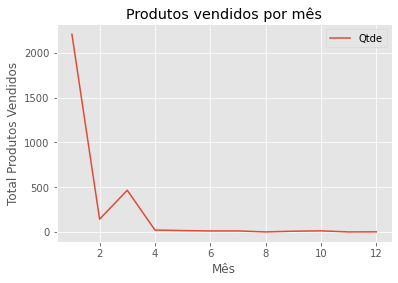

In [83]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Produtos vendidos por mês") #agrupou pelos meses e somou as quantidades das vends
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [84]:
#Traz os meses e a quantidade de vendas por cada mes
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [85]:
# selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

In [89]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

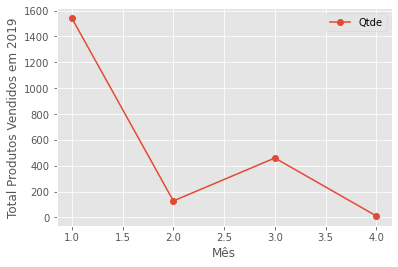

In [88]:
# gráfico da quantidade de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos em 2019")
plt.legend();

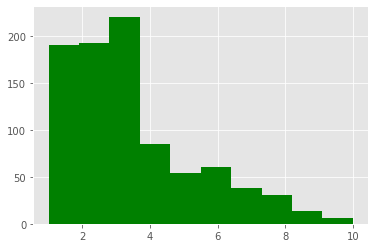

In [90]:
#Histograma
plt.hist(df["Qtde"], color="green");

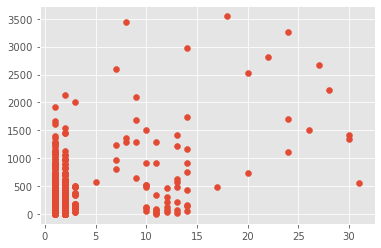

In [91]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

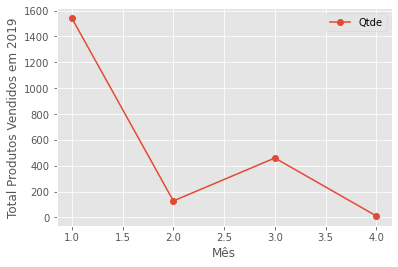

In [92]:
# Salvando as imagens em PNG
# gráfico da quantidade de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos em 2019")
plt.legend();
plt.savefig("grafico QTDE x MES.png")